Problem Coupling

1. When L is 0.2, it can be showned that the temp_y is always less than 277.5 and beta_y is always zero. So fractional coverage will decrease until it becomes zero.

$$ \alpha_p = x\alpha_g + (1-x)\alpha_y $$
This means that:
$$ \alpha_p - \alpha_y = x(\alpha_g - \alpha_y) $$
$$ 1 - \alpha_p = x(\alpha_y - \alpha_g) + 1 - \alpha_y $$
Besides,
$$ \eta = \frac{RS_0}{4\sigma} $$
$$ T^4_e = \frac{LS_0}{4\sigma} (1 - \alpha_p) $$
So
$$ temp_y = [\eta(\alpha_p - \alpha_y) + T^4_e]^{0.25} $$
$$  = (\frac{S_0}{4\sigma})^{0.25}[Rx(\alpha_g -\alpha_y) + Lx(\alpha_y - \alpha_g) + (1 - \alpha_y)L ]^{0.25} $$
$$  = (\frac{S_0}{4\sigma})^{0.25}[(\alpha_y - \alpha_g)(L - R)x + (1-\alpha_y)L]^{0.25} $$
$$ ≤(\frac{3668}{4*5.67e-8})^{0.25}[(0.6 - 0.3)(0.2 - 0.12) * 1 + (1 - 0.6)*0.2]^{0.25} $$
$$ =202.5 < 277.5 $$

Therefore, beta_y will always be zero and the fractional coverage will decrease to zero state.

2.When L = 0.8, the steady state will not be zero.

In [1]:
import numlabs.lab5.lab5_funs
from numlabs.lab5.lab5_funs import Integrator
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

class IntegCoupling(Integrator):
    """rewrite the init and derivs5 methods to
       work with a single (grey) daisy
    """

    def set_yinit(self):
        #
        # read in 'albedo_grey chi S0 L  R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'greyconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.greyconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """
           Make the growth rate depend on the ground temperature
           using the quadratic function of temperature

           y[0]=fraction grey daisies
           t = time
           returns f[0] = dy/dt
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0]
        albedo_p = x * user.albedo_ground + y[0] * user.albedo_grey
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        eta = user.R * user.S0 / (4.0 * sigma)
        temp_y = (eta * (albedo_p - user.albedo_grey) + Te_4)**0.25
        if(temp_y >= 277.5 and temp_y <= 312.5):
            beta_y = 1.0 - 0.003265 * (295.0 - temp_y)**2.0
        else:
            beta_y = 0.0

        # create a 1 x 1 element vector to hold the derivative
        f = np.empty([self.nvars], np.float64)
        f[0] = y[0] * (beta_y * x - user.chi)
        return f


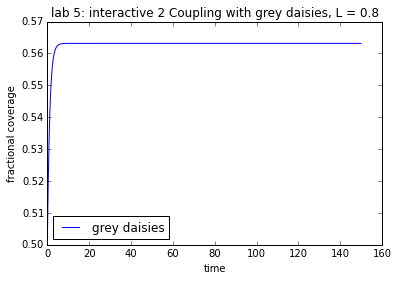

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theSolver = IntegCoupling('coupling.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, yVals)
theAx.set_title('lab 5: interactive 2 Coupling with grey daisies, L = 0.8')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out=theAx.legend(theLines, ('grey daisies',), loc='best')


3.Compute Te for 11 different L, from 0.4-1.2, equally spaced and plot L vs Te.

In [15]:
import numlabs.lab5.lab5_funs
from numlabs.lab5.lab5_funs import Integrator
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

class IntegCoupling(Integrator):
    """rewrite the init and derivs5 methods to
       work with a single (grey) daisy
    """

    def set_yinit(self, newL):
        #
        # read in 'albedo_grey chi S0 L  R albedo_ground'
        #
        self.config['uservars']['L'] = newL
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'greyconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.greyconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName,newL):
        super().__init__(coeffFileName)
        self.set_yinit(newL)

    def derivs5(self, y, t):
        """
           Make the growth rate depend on the ground temperature
           using the quadratic function of temperature

           y[0]=fraction grey daisies
           t = time
           returns f[0] = dy/dt
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0]
        albedo_p = x * user.albedo_ground + y[0] * user.albedo_grey
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        eta = user.R * user.S0 / (4.0 * sigma)
        temp_y = (eta * (albedo_p - user.albedo_grey) + Te_4)**0.25
        if(temp_y >= 277.5 and temp_y <= 312.5):
            beta_y = 1.0 - 0.003265 * (295.0 - temp_y)**2.0
        else:
            beta_y = 0.0

        # create a 1 x 1 element vector to hold the derivative
        f = np.empty([self.nvars], np.float64)
        f[0] = y[0] * (beta_y * x - user.chi)
        return f



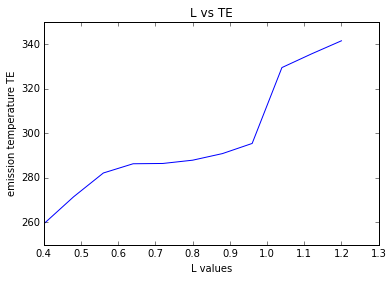

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# compute final concentration for 11 different L, from 0.4-1.2, equal spaced
Lvalues = []
# finalconcentration stores the concentration in steady state,albebo_p stores the albedo_p in steady state, and Te stores emission temperature
finalconcentration = []
albedo_p = []
Te = []
for i in range(0,11):
    Lvalues.append(0.4+ 0.08 * i)
    theSolver = IntegCoupling('coupling.yaml',Lvalues[i])
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    finalconcentration.append(yVals[-1])
    albedo_p.append((1 - finalconcentration[i]) * theSolver.uservars.albedo_ground + finalconcentration[i] * theSolver.uservars.albedo_grey)
    Te.append((theSolver.uservars.S0 * theSolver.uservars.L * (1 - albedo_p[i])/4.0/(5.67e-8))**0.25)
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(Lvalues, Te)
theAx.set_title('L vs TE')
theAx.set_xlabel('L values')
theAx.set_ylabel('emission temperature TE')


From this plot above, we can see that when L increases, Te tends to increase. In the middle of the curve, the speed of increasing decreases. This is because the steady state of daisy is not zero for those L about from 0.5 - 1.1. Because daisy reflects more light, it slows down the increasing speed.

After reading the the next section on the local temperature,

1.If we assume these conditions hold:
$$ \alpha_p = x\alpha_g + (1-x)\alpha_y $$
$$ T^4_e = \frac{LS_0}{4\sigma} (1 - \alpha_p) $$
$$ temp_y = [\eta(\alpha_p - \alpha_y) + T^4_e]^{0.25} $$
and there is only grey daisy,
compare $T_e$ with Temp_y(=$temp_y$)

In [7]:
import numlabs.lab5.lab5_funs
from numlabs.lab5.lab5_funs import Integrator
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

class IntegCoupling(Integrator):
    """rewrite the init and derivs5 methods to
       work with a single (grey) daisy
    """

    def set_yinit(self):
        #
        # read in 'albedo_grey chi S0 L  R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'greyconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.greyconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """
           Make the growth rate depend on the ground temperature
           using the quadratic function of temperature

           y[0]=fraction grey daisies
           t = time
           returns f[0] = dy/dt
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0]
        albedo_p = x * user.albedo_ground + y[0] * user.albedo_grey
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        self.Te = (Te_4)**0.25
        eta = user.R * user.S0 / (4.0 * sigma)
        temp_y = (eta * (albedo_p - user.albedo_grey) + Te_4)**0.25
        self.temp_y = temp_y
        if(temp_y >= 277.5 and temp_y <= 312.5):
            beta_y = 1.0 - 0.003265 * (295.0 - temp_y)**2.0
        else:
            beta_y = 0.0

        # create a 1 x 1 element vector to hold the derivative
        f = np.empty([self.nvars], np.float64)
        f[0] = y[0] * (beta_y * x - user.chi)
        return f


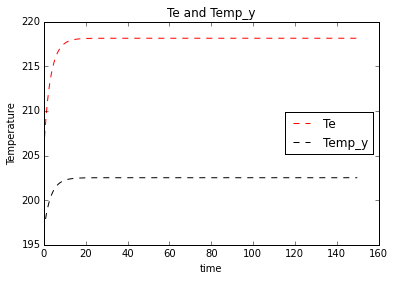

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
theSolver = IntegCoupling('coupling.yaml')
timeVals, yVals, errorList, Te, Temp_y = theSolver.timeloop5fixed()
plt.close('all')
thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timeVals[:-1], Te)
line2, = theAx.plot(timeVals[:-1], Temp_y)
line1.set(linestyle='--', color='r', label='Te')
line2.set(linestyle='--', color='k', label='Temp_y')
theAx.set_title('Te and Temp_y')
theAx.set_xlabel('time')
theAx.set_ylabel('Temperature')
out=theAx.legend(loc='center right')


From this plot above, we can find that emission temperature is higher than daisy temperature. We can explain as following:
The albedo of ground is less than that of daisy. Ground reflects less light and is  warmer than daisy. The emission temperature will occur when there is perfect conduction between ground and daisy. The outcome of the conduction is decreasing ground's temperature and increasing daisy's temperature and the final balance is emission temperature. So emission temperature is higher than daisy's temperature. 

We can also find that with time goes on, the emission temperature and daisy temperature increase. This is because in this model, the fractional coverage of daisy is decreasing with time going on and therefore $ x $ is increasing.
$$ \alpha_p = x\alpha_g + (1-x)\alpha_y $$
$$ T^4_e = \frac{LS_0}{4\sigma} (1 - \alpha_p) $$
$$ temp_y = [\eta(\alpha_p - \alpha_y) + T_e]^{0.25} $$
$$  = (\frac{S_0}{4\sigma})^{0.25}[(\alpha_y - \alpha_g)(L - R)x + (1-\alpha_y)L]^{0.25} $$
According to these equations, when $x$ is increasing, $\alpha_p$ is decreasing because $\alpha_g<\alpha_y$. So $T_e$ will increase. $temp_y$ will also increase because $\alpha_y>\alpha_g$ and $L - R >0$.

2.When the makeup of the global daisy changes, the weighted average albedo of daisy will change because different kinds of daisy have different albedoes.. This is equivalent to the change of $\alpha_y$ in the previous question. So the emission temperature will change. Under certain conduction conditions, the local temperature will also change because it's a combination of emission temperature and local temperautre without conduction.